# Data analyst

## Load libraries

In [106]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

## Load data

In [45]:
ROOT_PATH = os.pardir

RAW_DATA_PATH = ROOT_PATH + '\\data\\raw\\'

# print(os.path.abspath(os.pardir))


In [46]:
measure1_df = pd.read_csv(RAW_DATA_PATH + 'measure1_smartphone_sens.csv')
measure1_df.columns = measure1_df.columns.str.strip()

In [47]:
measure1_df.insert(0, 'datetime', pd.to_datetime(measure1_df['timestamp'], unit='ms'))
measure1_df.head()

,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,2015-01-30 14:51:23.421,1422629483421,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0,0,0
1,2015-01-30 14:51:23.520,1422629483520,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0,0,0
2,2015-01-30 14:51:23.620,1422629483620,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0,0,0
3,2015-01-30 14:51:23.723,1422629483723,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0,0,0
4,2015-01-30 14:51:23.822,1422629483822,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0,0,0


In [48]:
measure1_df.head(20)


,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,2015-01-30 14:51:23.421,1422629483421,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0,0,0
1,2015-01-30 14:51:23.520,1422629483520,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0,0,0
2,2015-01-30 14:51:23.620,1422629483620,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0,0,0
3,2015-01-30 14:51:23.723,1422629483723,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0,0,0
4,2015-01-30 14:51:23.822,1422629483822,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0,0,0
5,2015-01-30 14:51:23.922,1422629483922,-3.357,1.893,7.756,6.4,-31.5,-22.4,174.009,-2.757,-23.034,0,0,0
6,2015-01-30 14:51:24.022,1422629484022,-4.123,1.999,8.963,10.3,-31.5,-23.0,176.887,-11.444,-24.183,0,0,0
7,2015-01-30 14:51:24.122,1422629484122,-3.395,3.243,9.068,11.4,-32.3,-22.5,183.704,-18.518,-19.419,0,0,0
8,2015-01-30 14:51:24.222,1422629484222,-2.189,2.985,11.443,11.4,-33.1,-21.5,192.449,-13.901,-11.940,0,0,0
9,2015-01-30 14:51:24.322,1422629484322,-1.729,1.328,13.061,11.4,-34.3,-21.5,194.598,-5.752,-7.500,0,0,0


In [49]:
print(f'The first day of the measure 1 is {measure1_df.datetime.dt.date.min()} and the last day is {measure1_df.datetime.dt.date.max()}.')

The first day of the measure 1 is 2015-01-30 and the last day is 2015-02-05.


### Timestamp measure 1

In [50]:
m1_timestamp_df = pd.read_csv(RAW_DATA_PATH + 'measure1_timestamp_id.csv',
                              header=None, names=['arrival_ts', 'departure_ts', 'place_id'])
m1_timestamp_df.head()

,arrival_ts,departure_ts,place_id
0,1422629490743,1422629492743,34
1,1422629495152,1422629499732,94
2,1422629501522,1422629505849,95
3,1422629507213,1422629511556,35
4,1422629513047,1422629517152,36


In [51]:
m1_timestamp_df.insert(0, 'arrival_dt', pd.to_datetime(m1_timestamp_df['arrival_ts'], unit='ms'))
m1_timestamp_df.insert(2, 'departure_dt', pd.to_datetime(m1_timestamp_df['departure_ts'], unit='ms'))

In [52]:
m1_timestamp_df.sort_values(by='arrival_dt').head(10)


,arrival_dt,arrival_ts,departure_dt,departure_ts,place_id
0,2015-01-30 14:51:30.743,1422629490743,2015-01-30 14:51:32.743,1422629492743,34
1,2015-01-30 14:51:35.152,1422629495152,2015-01-30 14:51:39.732,1422629499732,94
2,2015-01-30 14:51:41.522,1422629501522,2015-01-30 14:51:45.849,1422629505849,95
3,2015-01-30 14:51:47.213,1422629507213,2015-01-30 14:51:51.556,1422629511556,35
4,2015-01-30 14:51:53.047,1422629513047,2015-01-30 14:51:57.152,1422629517152,36
5,2015-01-30 14:51:58.651,1422629518651,2015-01-30 14:52:01.776,1422629521776,96
6,2015-01-30 14:52:03.052,1422629523052,2015-01-30 14:52:05.921,1422629525921,97
7,2015-01-30 14:52:07.786,1422629527786,2015-01-30 14:52:10.685,1422629530685,37
8,2015-01-30 14:52:12.364,1422629532364,2015-01-30 14:52:15.214,1422629535214,38
9,2015-01-30 14:52:17.055,1422629537055,2015-01-30 14:52:20.053,1422629540053,98


In [53]:
m1_timestamp_df.head(40)

,arrival_dt,arrival_ts,departure_dt,departure_ts,place_id
0,2015-01-30 14:51:30.743,1422629490743,2015-01-30 14:51:32.743,1422629492743,34
1,2015-01-30 14:51:35.152,1422629495152,2015-01-30 14:51:39.732,1422629499732,94
2,2015-01-30 14:51:41.522,1422629501522,2015-01-30 14:51:45.849,1422629505849,95
3,2015-01-30 14:51:47.213,1422629507213,2015-01-30 14:51:51.556,1422629511556,35
4,2015-01-30 14:51:53.047,1422629513047,2015-01-30 14:51:57.152,1422629517152,36
5,2015-01-30 14:51:58.651,1422629518651,2015-01-30 14:52:01.776,1422629521776,96
6,2015-01-30 14:52:03.052,1422629523052,2015-01-30 14:52:05.921,1422629525921,97
7,2015-01-30 14:52:07.786,1422629527786,2015-01-30 14:52:10.685,1422629530685,37
8,2015-01-30 14:52:12.364,1422629532364,2015-01-30 14:52:15.214,1422629535214,38
9,2015-01-30 14:52:17.055,1422629537055,2015-01-30 14:52:20.053,1422629540053,98


In [54]:
m1_timestamp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   arrival_dt    324 non-null    datetime64[ns]
 1   arrival_ts    324 non-null    int64         
 2   departure_dt  324 non-null    datetime64[ns]
 3   departure_ts  324 non-null    int64         
 4   place_id      324 non-null    int64         
dtypes: datetime64[ns](2), int64(3)
memory usage: 12.8 KB


### Points mapping

In [55]:
points_df = pd.read_excel(RAW_DATA_PATH + 'PointsMapping.ods', engine='odf', index_col=0)
points_df.head()

,X,Y
ID,,
1,0.6,0.6
2,1.2,0.6
3,1.8,0.6
4,0.6,1.2
5,1.8,1.2


In [56]:
points_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 1 to 325
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       325 non-null    float64
 1   Y       325 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


In [57]:
points_df.iloc[0, 0]

0.6

In [58]:
points_df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            316, 317, 318, 319, 320, 321, 322, 323, 324, 325],
           dtype='int64', name='ID', length=325)

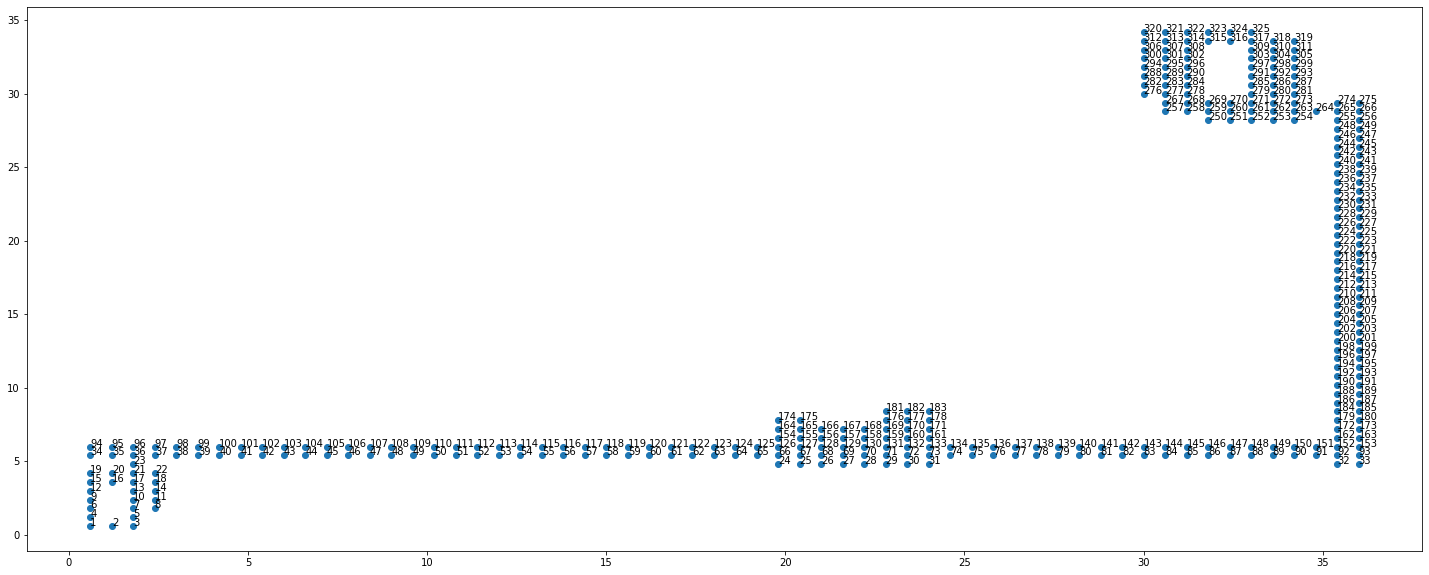

In [59]:
plt.figure(figsize=(25, 10))
plt.scatter(points_df.X, points_df.Y)
for i, label in enumerate(points_df.index):
    plt.text(points_df.iloc[i, 0], points_df.iloc[i, 1], label)

In [60]:
import plotly.express as px

fig = px.scatter(points_df, x="X", y="Y", text=range(0, 325))

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='GDP and Life Expectancy (Americas, 2007)'
)

fig.show()

In [61]:
m1_timestamp_df.head()

,arrival_dt,arrival_ts,departure_dt,departure_ts,place_id
0,2015-01-30 14:51:30.743,1422629490743,2015-01-30 14:51:32.743,1422629492743,34
1,2015-01-30 14:51:35.152,1422629495152,2015-01-30 14:51:39.732,1422629499732,94
2,2015-01-30 14:51:41.522,1422629501522,2015-01-30 14:51:45.849,1422629505849,95
3,2015-01-30 14:51:47.213,1422629507213,2015-01-30 14:51:51.556,1422629511556,35
4,2015-01-30 14:51:53.047,1422629513047,2015-01-30 14:51:57.152,1422629517152,36


In [96]:
points_df

,X,Y
ID,,
1,0.6,0.6
2,1.2,0.6
3,1.8,0.6
4,0.6,1.2
5,1.8,1.2
...,...,...
321,30.6,34.2
322,31.2,34.2
323,31.8,34.2


### Smartphone WIFI - Measure 1

In [ ]:
col = [f'WAP{str(num).zfill(3)}' for num in range(1, 128)]
# col.insert(0, 'id')

In [99]:
m1_wifi_df = pd.read_csv(RAW_DATA_PATH + 'measure1_smartphone_wifi.csv',
                              header=None, names=col)
m1_wifi_df.index.name = 'id'
m1_wifi_df.index = range(1,326)
m1_wifi_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127
1,-100,-100,-100,-100,-82,-82,-100,-100,-100,-100,...,-100,-71,-71,-60,-100,-78,-100,-100,-86,-86
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
3,-100,-100,-100,-100,-90,-100,-100,-100,-100,-100,...,-100,-70,-69,-66,-100,-100,-100,-100,-86,-86
4,-100,-100,-100,-100,-88,-87,-100,-100,-100,-100,...,-100,-70,-75,-69,-100,-81,-100,-100,-86,-86
5,-100,-100,-100,-100,-80,-82,-100,-100,-100,-100,...,-100,-71,-71,-65,-63,-83,-100,-100,-100,-100


Insert the coordinates

In [97]:
points_df

,X,Y
ID,,
1,0.6,0.6
2,1.2,0.6
3,1.8,0.6
4,0.6,1.2
5,1.8,1.2
...,...,...
321,30.6,34.2
322,31.2,34.2
323,31.8,34.2


In [103]:
m1_wifi_df['x'] = [points_df.loc[id, 'X'] for id in m1_wifi_df.index]
m1_wifi_df['y'] = [points_df.loc[id, 'Y'] for id in m1_wifi_df.index]

In [104]:
m1_wifi_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,x,y
1,-100,-100,-100,-100,-82,-82,-100,-100,-100,-100,...,-71,-60,-100,-78,-100,-100,-86,-86,0.6,0.6
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,1.2,0.6
3,-100,-100,-100,-100,-90,-100,-100,-100,-100,-100,...,-69,-66,-100,-100,-100,-100,-86,-86,1.8,0.6
4,-100,-100,-100,-100,-88,-87,-100,-100,-100,-100,...,-75,-69,-100,-81,-100,-100,-86,-86,0.6,1.2
5,-100,-100,-100,-100,-80,-82,-100,-100,-100,-100,...,-71,-65,-63,-83,-100,-100,-100,-100,1.8,1.2


## Analyze data

In [64]:
measure1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18354 entries, 0 to 18353
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             18354 non-null  datetime64[ns]
 1   timestamp            18354 non-null  int64         
 2   AccelerationX        18354 non-null  float64       
 3   AccelerationY        18354 non-null  float64       
 4   AccelerationZ        18354 non-null  float64       
 5   MagneticFieldX       18354 non-null  float64       
 6   MagneticFieldY       18354 non-null  float64       
 7   MagneticFieldZ       18354 non-null  float64       
 8   Z-AxisAgle(Azimuth)  18354 non-null  float64       
 9   X-AxisAngle(Pitch)   18354 non-null  float64       
 10  Y-AxisAngle(Roll)    18354 non-null  float64       
 11  GyroX                18354 non-null  int64         
 12  GyroY                18354 non-null  int64         
 13  GyroZ                18354 non-

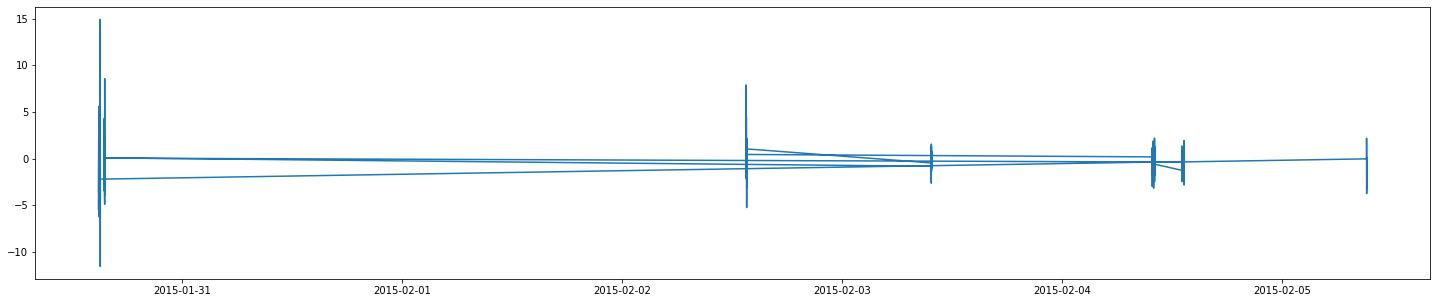

In [65]:
plt.figure(figsize=(25, 5))
plt.plot(measure1_df.datetime, measure1_df.AccelerationX)

The data is not sorted.

In [66]:
# Sort the dataframe
measure1_df = measure1_df.sort_values(by='datetime')

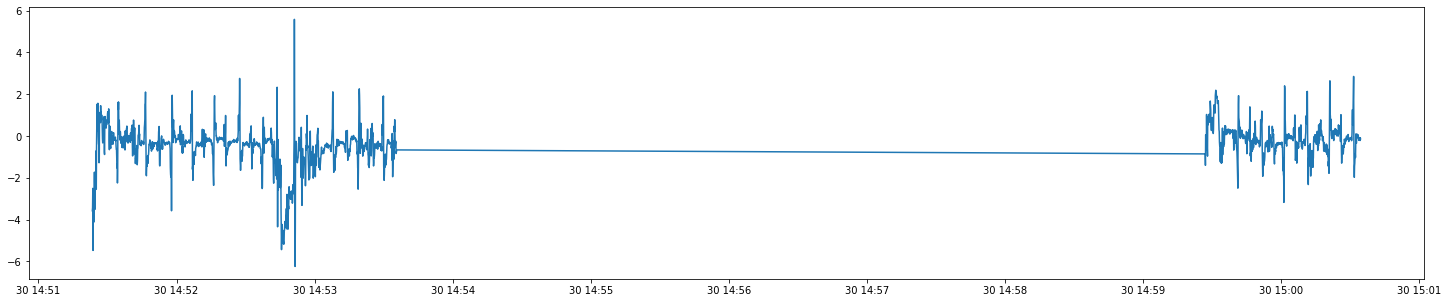

In [67]:
rng = range(0, 2000)
plt.figure(figsize=(25, 5))
plt.plot(measure1_df.datetime[rng], measure1_df.AccelerationX[rng])


In [68]:
import plotly.express as px
import pandas as pd

fig = px.line(measure1_df.iloc[rng], x='datetime', y='AccelerationX', title='Time Series of acceleration in x')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [69]:
fig = px.line(measure1_df, x='datetime', y='AccelerationX', title='Time Series of acceleration in x')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [49]:
measure1_df[measure1_df.datetime < '2015-02-01']

,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,2015-01-30 14:51:23.421,1422629483421,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0,0,0
1,2015-01-30 14:51:23.520,1422629483520,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0,0,0
2,2015-01-30 14:51:23.620,1422629483620,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0,0,0
3,2015-01-30 14:51:23.723,1422629483723,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0,0,0
4,2015-01-30 14:51:23.822,1422629483822,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,2015-01-30 15:34:25.370,1422632065370,0.234,3.081,8.493,18.6,-6.2,-22.9,275.674,-19.931,1.479,0,0,0
7583,2015-01-30 15:34:25.469,1422632065469,0.320,2.860,9.183,16.6,-6.6,-23.7,272.381,-17.291,1.902,0,0,0
7584,2015-01-30 15:34:25.569,1422632065569,0.866,3.435,8.819,16.6,-5.7,-24.5,279.988,-21.188,5.217,0,0,0
7585,2015-01-30 15:34:25.669,1422632065669,0.071,3.157,8.781,16.6,-2.5,-25.5,290.684,-19.773,0.426,0,0,0


In [60]:
import plotly.express as px

# px.scatter(measure1_df[measure1_df.datetime < '2015-02-01'], x="AccelerationX", y="AccelerationY", animation_frame="datetime",
px.scatter(measure1_df.iloc[:10], x="AccelerationX", y="AccelerationY", animation_frame="timestamp",
        #    size="pop", color="continent", hover_name="country",
        #    log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90]
           )